In [2]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

# Функция для создания хеш-функций
def create_hash_functions(n):
    # Создаем n случайных хеш-функций
    hash_funcs = []
    for _ in range(n):
        # Генерируем случайные параметры a и b для хеш-функции вида (a * x + b) % c
        a = random.randint(1, 1000)
        b = random.randint(1, 1000)
        # Используем замыкание для фиксации значений a и b
        hash_func = lambda x, a=a, b=b: (a * x + b) % 997  # 997 - простое число
        hash_funcs.append(hash_func)
    return hash_funcs

In [3]:
# Основная функция MinHash
def minhash(set_list, num_hashes=8):
    # set_list - список множеств, например, [{1, 2, 3}, {2, 3, 4}]
    # num_hashes - количество хеш-функций (размер сигнатуры)
    
    # Создаем хеш-функции
    hash_funcs = create_hash_functions(num_hashes)
    
    # Инициализируем сигнатуры для каждого множества бесконечностью
    signatures = [[float('inf')] * num_hashes for _ in range(len(set_list))]
    
    all_elements = set()  # Создаем пустое множество для хранения уникальных элементов
    for s in set_list:  # Проходимся по каждому множеству в set_list
        for element in s:  # Проходимся по каждому элементу множества
            all_elements.add(element)  

    # Проходим по всем элементам всех множеств
    for element in all_elements:  # Получаем все уникальные элементы
        # Вычисляем хеш-значения для текущего элемента с каждой хеш-функцией
        hash_values = [h(element) for h in hash_funcs]
        
        # Для каждого множества обновляем сигнатуру
        for i, signature in enumerate(set_list):
            if element in signature:
                # Если элемент есть в множестве, сравниваем с текущими значениями сигнатуры
                for j in range(num_hashes):
                    signatures[i][j] = min(signatures[i][j], hash_values[j])
    
    return signatures

In [4]:
# Функция для оценки схожести Жаккара по сигнатурам
def jaccard_similarity(signature1, signature2):
    # Считаем, сколько значений совпадает в сигнатурах
    matches = sum(1 for x, y in zip(signature1, signature2) if x == y)
    return matches / len(signature1)

In [5]:
# Пример множеств
set1 = {1, 2, 3, 4}
set2 = {2,3,5,6}
sets = [set1, set2]

# Получаем сигнатуры
signatures = minhash(sets)
print("Сигнатура множества 1:", signatures[0])
print("Сигнатура множества 2:", signatures[1])

# Оцениваем схожесть
similarity = jaccard_similarity(signatures[0], signatures[1])
print("Примерная схожесть Жаккара:", similarity)

# Реальная схожесть Жаккара для проверки
real_jaccard = len(set1.intersection(set2)) / len(set1.union(set2))
print("Реальная схожесть Жаккара:", real_jaccard)


Сигнатура множества 1: [87, 142, 95, 97, 52, 47, 366, 80]
Сигнатура множества 2: [87, 142, 95, 41, 419, 122, 391, 80]
Примерная схожесть Жаккара: 0.5
Реальная схожесть Жаккара: 0.3333333333333333


In [6]:
# Функция для вычисления ошибки MinHash
def minhash_error(jaccard, num_hashes):
    return np.sqrt(jaccard * (1 - jaccard) / num_hashes)

In [7]:
# Генерация данных для анализа
jaccard_values = np.linspace(0.01, 1, 20)  # Значения коэффициента Жаккара от 0.01 до 1
num_hashes_list = [10, 50, 100, 200]        # Число хэш-функций

data = []
for num_hashes in num_hashes_list:
    errors = [minhash_error(j, num_hashes) for j in jaccard_values]
    data.append(errors)

# Создание DataFrame для таблицы
df_table = pd.DataFrame({
    'Jaccard': jaccard_values,
    'k=10': data[0],
    'k=50': data[1],
    'k=100': data[2],
    'k=200': data[3]
})

# Вывод таблицы
print("Таблица ошибок MinHash:")
print(df_table.round(4))

Таблица ошибок MinHash:
    Jaccard    k=10    k=50   k=100   k=200
0    0.0100  0.0315  0.0141  0.0099  0.0070
1    0.0621  0.0763  0.0341  0.0241  0.0171
2    0.1142  0.1006  0.0450  0.0318  0.0225
3    0.1663  0.1178  0.0527  0.0372  0.0263
4    0.2184  0.1307  0.0584  0.0413  0.0292
5    0.2705  0.1405  0.0628  0.0444  0.0314
6    0.3226  0.1478  0.0661  0.0467  0.0331
7    0.3747  0.1531  0.0685  0.0484  0.0342
8    0.4268  0.1564  0.0699  0.0495  0.0350
9    0.4789  0.1580  0.0706  0.0500  0.0353
10   0.5311  0.1578  0.0706  0.0499  0.0353
11   0.5832  0.1559  0.0697  0.0493  0.0349
12   0.6353  0.1522  0.0681  0.0481  0.0340
13   0.6874  0.1466  0.0656  0.0464  0.0328
14   0.7395  0.1388  0.0621  0.0439  0.0310
15   0.7916  0.1284  0.0574  0.0406  0.0287
16   0.8437  0.1148  0.0514  0.0363  0.0257
17   0.8958  0.0966  0.0432  0.0306  0.0216
18   0.9479  0.0703  0.0314  0.0222  0.0157
19   1.0000  0.0000  0.0000  0.0000  0.0000


<module 'matplotlib.pyplot' from 'c:\\Users\\user\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\matplotlib\\pyplot.py'>

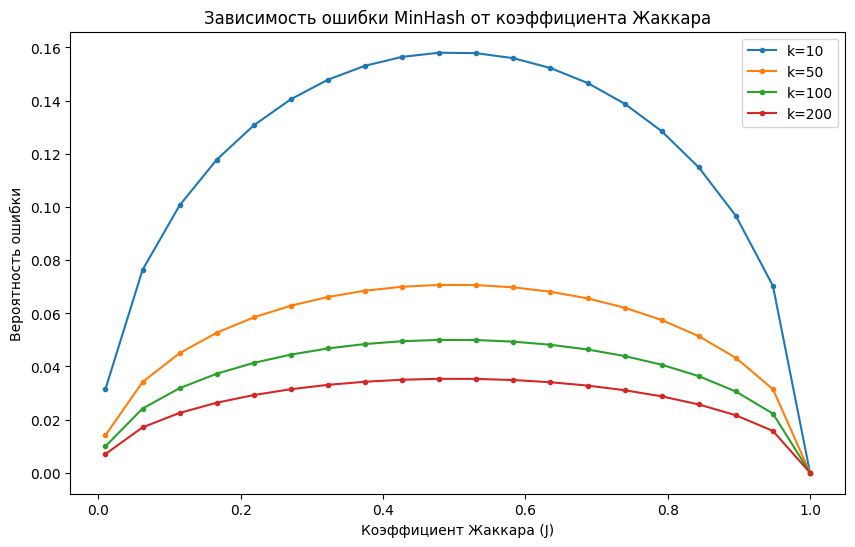

In [8]:
# Построение графика
plt.figure(figsize=(10, 6))
for i, num_hashes in enumerate(num_hashes_list):
    plt.plot(jaccard_values, data[i], label=f'k={num_hashes}', marker='o', markersize=3)

plt.title('Зависимость ошибки MinHash от коэффициента Жаккара')
plt.xlabel('Коэффициент Жаккара (J)')
plt.ylabel('Вероятность ошибки')
plt.legend()
plt